In [34]:
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('project_data.csv')

In [36]:
df.dtypes

user                     int64
adid                    object
week                    object
expid                    int64
if_click                 int64
real_like_cnt            int64
category                object
brand_effect             int64
experience               int64
status                   int64
user_age                 int64
friend_age               int64
user_gender             object
friend_gender           object
user_city               object
friend_city             object
user_degree              int64
friend_degree            int64
user_sns_like_cnt        int64
user_sns_comment_cnt     int64
dtype: object

In [37]:
user_gender_int=[]
for i in df.user_gender:
    if i=="female":
        user_gender_int.append(0)
    else:
        user_gender_int.append(1)

In [38]:
friend_gender_int=[]
for i in df.friend_gender:
    if i=="female":
        friend_gender_int.append(0)
    else:
        friend_gender_int.append(1)

In [39]:
user_city_int=[]
for i in df.user_city:
    if i=="level_1":
        user_city_int.append(1)
    if i=="level_2":
        user_city_int.append(2)
    if i=="level_3":
        user_city_int.append(3)

In [40]:
friend_city_int=[]
for i in df.friend_city:
    if i=="level_1":
        friend_city_int.append(1)
    if i=="level_2":
        friend_city_int.append(2)
    if i=="level_3":
        friend_city_int.append(3)

In [41]:
week_int=[]
for i in df.week:
    if i=="w_1":
        week_int.append(1)
    if i=="w_2":
        week_int.append(2)
    if i=="w_3":
        week_int.append(3)

In [42]:
df["user_gender_int"]=user_gender_int

In [43]:
df['friend_gender_int']=friend_gender_int

In [44]:
df['user_city_int']=user_city_int

In [45]:
df['friend_city_int']=friend_city_int

In [46]:
df['week_int']=week_int

# show distributions

<AxesSubplot:ylabel='Frequency'>

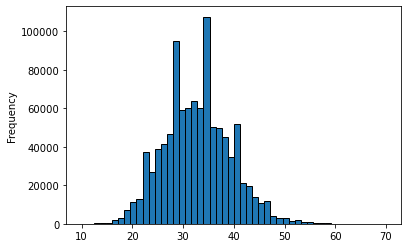

In [47]:
# age distribution
df.user_age.plot.hist(bins = 50, edgecolor = 'black')

In [48]:
df.user_gender_int

0         0
1         0
2         0
3         1
4         0
         ..
999995    0
999996    1
999997    0
999998    0
999999    0
Name: user_gender_int, Length: 1000000, dtype: int64

In [50]:
num_male = sum(df.user_gender_int)

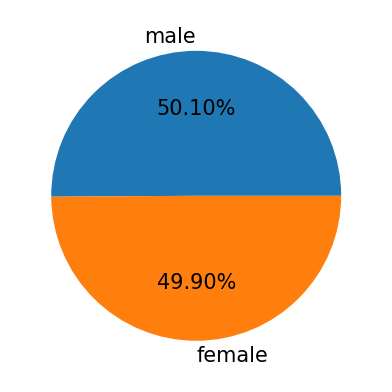

In [58]:
# user_gender distribution
my_dpi=150
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x = [num_male, len(df.user_gender_int)-num_male],
        labels = ["male", 'female'],
        autopct='%.2f%%')
plt.show()

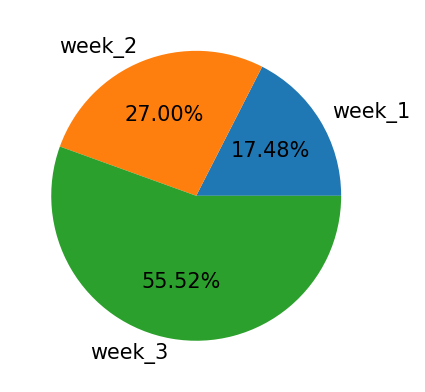

In [60]:
# week
my_dpi=150
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x = [len(df[df.week_int==1]),len(df[df.week_int==2]),len(df[df.week_int==3])],
        labels = ["week_1", "week_2","week_3"],
        autopct='%.2f%%')
plt.show()

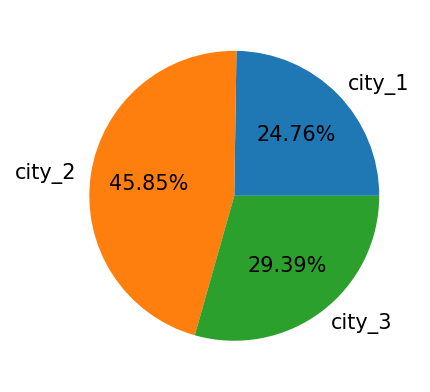

In [61]:
#user_city distribution
my_dpi=150
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x = [len(df[df.user_city_int==1]),len(df[df.user_city_int==2]),len(df[df.user_city_int==3])],
        labels = ["city_1", "city_2","city_3"],
        autopct='%.2f%%')
plt.show()

<AxesSubplot:ylabel='Frequency'>

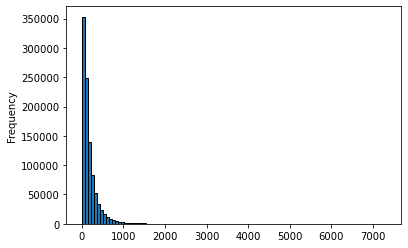

In [18]:
# user_sns_comment_cnt
df.user_sns_comment_cnt.plot.hist(bins = 100, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

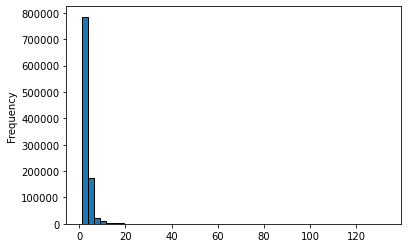

In [19]:
# real_like_cnt
df.real_like_cnt.plot.hist(bins = 50, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

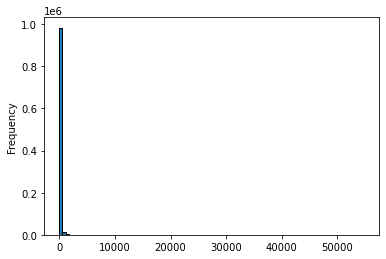

In [20]:
# user_sns_like_cnt
df.user_sns_like_cnt.plot.hist(bins = 100, edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

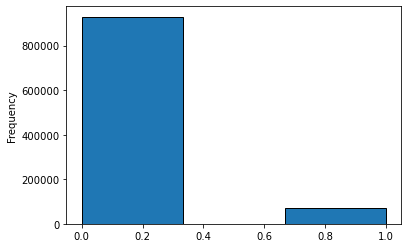

In [21]:
# if_click
df.if_click.plot.hist(bins = 3, edgecolor = 'black')

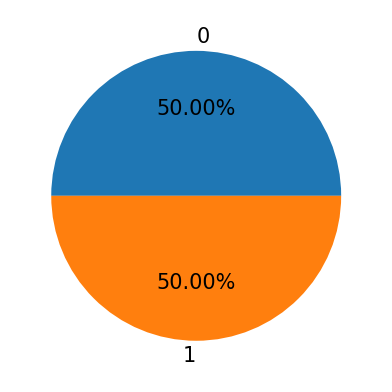

In [63]:
# expid
my_dpi=150
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x = [len(df[df.expid==0]), len(df[df.expid==1])],
        labels = ["0", '1'],
        autopct='%.2f%%')
plt.show()

In [23]:
df[df['expid'] == 0].describe()

,user,expid,if_click,real_like_cnt,brand_effect,experience,status,user_age,friend_age,user_degree,friend_degree,user_sns_like_cnt,user_sns_comment_cnt,user_gender_int,friend_gender_int,user_city_int,friend_city_int,week_int
count,500000.000000,500000.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,500523.203830,0.0,0.066604,2.844764,0.397112,0.987116,0.782856,32.638250,32.135304,502.600602,858.208852,103.397966,180.445350,0.500276,0.499664,2.045772,2.047700,2.379436
std,288799.103625,0.0,0.249335,2.459804,0.489300,0.112774,0.412302,6.580018,6.401644,451.300631,861.454749,239.628509,216.249302,0.500000,0.500000,0.734821,0.732187,0.765319
min,3.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,10.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,250401.500000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,28.000000,28.000000,273.000000,389.000000,33.000000,53.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,500060.000000,0.0,0.000000,3.000000,0.000000,1.000000,1.000000,32.000000,32.000000,390.000000,575.000000,59.000000,111.000000,1.000000,0.000000,2.000000,2.000000,3.000000
75%,751162.250000,0.0,0.000000,3.000000,1.000000,1.000000,1.000000,37.000000,36.000000,572.000000,946.000000,114.000000,226.000000,1.000000,1.000000,3.000000,3.000000,3.000000
max,999681.000000,0.0,1.000000,116.000000,1.000000,1.000000,1.000000,70.000000,70.000000,12865.000000,17676.000000,54769.000000,7313.000000,1.000000,1.000000,3.000000,3.000000,3.000000


In [24]:
feature=list(df.columns)
feature

['user',
 'adid',
 'week',
 'expid',
 'if_click',
 'real_like_cnt',
 'category',
 'brand_effect',
 'experience',
 'status',
 'user_age',
 'friend_age',
 'user_gender',
 'friend_gender',
 'user_city',
 'friend_city',
 'user_degree',
 'friend_degree',
 'user_sns_like_cnt',
 'user_sns_comment_cnt',
 'user_gender_int',
 'friend_gender_int',
 'user_city_int',
 'friend_city_int',
 'week_int']

In [25]:
feature.remove('user')
feature.remove('expid')
feature.remove("adid")
feature.remove("week")
feature.remove('category')
feature.remove('user_gender')
feature.remove('friend_gender')
feature.remove('user_city')
feature.remove('friend_city')

In [26]:
feature

['if_click',
 'real_like_cnt',
 'brand_effect',
 'experience',
 'status',
 'user_age',
 'friend_age',
 'user_degree',
 'friend_degree',
 'user_sns_like_cnt',
 'user_sns_comment_cnt',
 'user_gender_int',
 'friend_gender_int',
 'user_city_int',
 'friend_city_int',
 'week_int']

# Randomization checks

In [27]:
def multi_cm(x):
    x0 = df[df['expid'] == 0][x]
    x1 = df[df['expid'] == 1][x]
    cm01 = sms.CompareMeans(sms.DescrStatsW(x0), sms.DescrStatsW(x1)) 
    print(x)
    print(cm01.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled'))
    return
for i in feature:
    multi_cm(i)

if_click
(-0.00890569808391873, -0.006898301916081283)
real_like_cnt
(-0.007142305509456694, 0.012166305509457277)
brand_effect
(-0.0019020166755204892, 0.0019340166755205212)
experience
(-0.0007434854411718893, 0.00013548544117194736)
status
(-0.001680109478772677, 0.001552109478772771)
user_age
(-0.03325674544037227, 0.018340745440372782)
friend_age
(-0.057547764105012826, -0.007384235894986053)
user_degree
(-1.1333290972219368, 2.4117810972219527)
friend_degree
(1.2935001471932592, 8.020579852806616)
user_sns_like_cnt
(-0.21764140669843968, 1.537325406698435)
user_sns_comment_cnt
(-0.2755972666490246, 1.4135252666490126)
user_gender_int
(-0.0033679626092894244, 0.0005519626092894948)
friend_gender_int
(-0.002605967907162667, 0.001313967907162596)
user_city_int
(-0.0039347925798188105, 0.0018227925798184742)
friend_city_int
(-0.0030762065900706856, 0.0026602065900702696)
week_int
(-0.0048389909819123965, 0.0011589909819122684)


In [28]:
def multi_cm_(x):
    x0 = df[df['expid'] == 0][x]
    x1 = df[df['expid'] == 1][x]
    cm01 = sms.CompareMeans(sms.DescrStatsW(x0), sms.DescrStatsW(x1)) 
    print(x)
    print(cm01.tconfint_diff(alpha=0.01, alternative='two-sided', usevar='pooled'))
    return
for i in feature:
    multi_cm_(i)

if_click
(-0.009221083800712829, -0.006582916199287184)
real_like_cnt
(-0.010175917022753021, 0.015199917022753605)
brand_effect
(-0.0025047029551139573, 0.0025367029551139893)
experience
(-0.0008815821787320657, 0.0002735821787321238)
status
(-0.002187929364599764, 0.002059929364599858)
user_age
(-0.041363322461355434, 0.02644732246135595)
friend_age
(-0.06542904860426738, 0.0004970486042685032)
user_degree
(-1.6903079027525099, 2.9687599027525255)
friend_degree
(0.2365962390964773, 9.077483760903398)
user_sns_like_cnt
(-0.4933674817309033, 1.8130514817308985)
user_sns_comment_cnt
(-0.5409784253124714, 1.6789064253124595)
user_gender_int
(-0.003983829295023222, 0.0011678292950232923)
friend_gender_int
(-0.003221836257613728, 0.0019298362576136573)
user_city_int
(-0.004839377410491013, 0.002727377410490678)
friend_city_int
(-0.00397746505196906, 0.0035614650519686436)
week_int
(-0.005781344998168592, 0.0021013449981684643)


In [29]:
def multi_cm__(x):
    x0 = df[df['expid'] == 0][x]
    x1 = df[df['expid'] == 1][x]
    cm01 = sms.CompareMeans(sms.DescrStatsW(x0), sms.DescrStatsW(x1)) 
    print(x)
    print(cm01.tconfint_diff(alpha=0.001, alternative='two-sided', usevar='pooled'))
    return
for i in feature:
    multi_cm__(i)

if_click
(-0.009587082567743705, -0.006216917432256308)
real_like_cnt
(-0.013696362034668362, 0.018720362034668946)
brand_effect
(-0.003204108234084292, 0.003236108234084324)
experience
(-0.001041840659020216, 0.000433840659020274)
status
(-0.00277724410584981, 0.002649244105849904)
user_age
(-0.05077084168790843, 0.035854841687908943)
friend_age
(-0.07457512040063194, 0.009643120400633066)
user_degree
(-2.3366705794098275, 3.615122579409843)
friend_degree
(-0.9899194419737549, 10.30399944197363)
user_sns_like_cnt
(-0.8133420339267083, 2.1330260339267033)
user_sns_comment_cnt
(-0.8489479105870961, 1.9868759105870841)
user_gender_int
(-0.0046985301696386705, 0.0018825301696387409)
friend_gender_int
(-0.003936539064100006, 0.0026445390640999346)
user_city_int
(-0.005889129872543715, 0.0037771298725433793)
friend_city_int
(-0.005023357330110178, 0.004607357330109762)
week_int
(-0.006874927838768609, 0.003194927838768481)
